In [457]:
import pandas as pd 
import numpy as np 
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [458]:
data_path = "/Users/ertuboston/Documents/Data_Science_Merrimack/DSE6211 - Machine Learning & AI /PROJECT/DATA/project_data.csv"

data = pd.read_csv(data_path)

In [459]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,meal_plan_1,0,room_type1,224,2017-10-02,offline,0,0,0,65.00,0,not_canceled
1,INN00002,2,0,2,3,not_selected,0,room_type1,5,2018-11-06,online,0,0,0,106.68,1,not_canceled
2,INN00003,1,0,2,1,meal_plan_1,0,room_type1,1,2018-02-28,online,0,0,0,60.00,0,canceled
3,INN00004,2,0,0,2,meal_plan_1,0,room_type1,211,2018-05-20,online,0,0,0,100.00,0,canceled
4,INN00005,2,0,1,1,not_selected,0,room_type1,48,2018-04-11,online,0,0,0,94.50,0,canceled


In [460]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [461]:
# check the na values in the data

nan_counts = data.isna().sum()
nan_counts

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [462]:
data.info()   # or print(data.types())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36238 entries, 0 to 36237
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36238 non-null  object 
 1   no_of_adults                          36238 non-null  int64  
 2   no_of_children                        36238 non-null  int64  
 3   no_of_weekend_nights                  36238 non-null  int64  
 4   no_of_week_nights                     36238 non-null  int64  
 5   type_of_meal_plan                     36238 non-null  object 
 6   required_car_parking_space            36238 non-null  int64  
 7   room_type_reserved                    36238 non-null  object 
 8   lead_time                             36238 non-null  int64  
 9   arrival_date                          36238 non-null  object 
 10  market_segment_type                   36238 non-null  object 
 11  repeated_guest 

In [463]:
print(isinstance(data,np.ndarray))

False


In [464]:
data.shape, data.size, data.ndim

((36238, 17), 616046, 2)

##### We have a total of 17 features and 16 of them are inputs while the one at the end is the output. 


##### Target value or dependent value is "booking status". The target value is an object and there are more object types in the data frame,


#### **Some Ideas**
##### Before we continue with the data frame, we should convert them to numerical types for machine learning models, like int or float. 

##### But first we should take care of the arrival_date feature

In [467]:
# Lets convert the arrival_data column to date

data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [468]:
# lets take the season out. 

def get_season(date): 
    month = date.month
    if month in [12,1,2]: 
        return 'Winter'
    elif month in [3,4,5]: 
        return 'Spring'
    elif month in [6,7,8]: 
        return ' Summer'
    elif month in [9,10,11]: 
        return 'Fall'

## Add the season column in to data 
data['season'] = data['arrival_date'].apply(get_season)

In [469]:
# Now let's drop the arrival date 

data = data.drop(columns = ['arrival_date'])

In [470]:
# First drop the target value and we can put it in another data set "y"
# We should also drop the bookingID column since it won't be useful for the training model

X = data.drop(['Booking_ID','booking_status'], axis = 1)
y = data['booking_status']
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, random_state = 33)

In [471]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 33)

In [472]:
X.shape, X_train.shape, X_test.shape, X_valid.shape

((36238, 15), (21742, 15), (7248, 15), (7248, 15))

In [473]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,season
0,2,0,1,2,meal_plan_1,0,room_type1,224,offline,0,0,0,65.00,0,Fall
1,2,0,2,3,not_selected,0,room_type1,5,online,0,0,0,106.68,1,Fall
2,1,0,2,1,meal_plan_1,0,room_type1,1,online,0,0,0,60.00,0,Winter
3,2,0,0,2,meal_plan_1,0,room_type1,211,online,0,0,0,100.00,0,Spring
4,2,0,1,1,not_selected,0,room_type1,48,online,0,0,0,94.50,0,Spring


##### the features 'type_of_meal, room_type_reserved, season, market_segment_type and booking_status' are object. I would like to check the unique values in these columns so I can understand how many columns would be created after I do one hot encoding

In [475]:
print(X[['type_of_meal_plan', 'room_type_reserved', 'season', 'market_segment_type']].nunique())

type_of_meal_plan      4
room_type_reserved     7
season                 4
market_segment_type    5
dtype: int64


In [476]:
## Now we can start the process of one hot encoding

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[['type_of_meal_plan','room_type_reserved','market_segment_type','season']])
encoded_df = pd.DataFrame(encoder.transform(X_train[['type_of_meal_plan','room_type_reserved','market_segment_type','season']]).toarray(),
                          columns=encoder.get_feature_names_out(['type_of_meal_plan','room_type_reserved','market_segment_type','season'])) 
X_train = pd.concat([X_train.drop(['type_of_meal_plan','room_type_reserved','market_segment_type','season'], axis=1).reset_index(drop=True),encoded_df],axis =1)

X_train.columns


                          

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_meal_plan_1',
       'type_of_meal_plan_meal_plan_2', 'type_of_meal_plan_meal_plan_3',
       'type_of_meal_plan_not_selected', 'room_type_reserved_room_type1',
       'room_type_reserved_room_type2', 'room_type_reserved_room_type3',
       'room_type_reserved_room_type4', 'room_type_reserved_room_type5',
       'room_type_reserved_room_type6', 'room_type_reserved_room_type7',
       'market_segment_type_aviation', 'market_segment_type_complementary',
       'market_segment_type_corporate', 'market_segment_type_offline',
       'market_segment_type_online', 'season_ Summer', 'season_Fall',
       'season_Spring', 'season_Winter'],
      dtype='object')

In [477]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_room_type7,market_segment_type_aviation,market_segment_type_complementary,market_segment_type_corporate,market_segment_type_offline,market_segment_type_online,season_ Summer,season_Fall,season_Spring,season_Winter
0,2,0,0,2,0,1,0,0,0,102.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,0,1,0,0,16,0,0,0,129.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,0,0,2,0,148,0,0,0,93.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,0,0,3,0,103,0,0,0,95.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,0,1,2,0,302,0,0,0,100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [478]:
X_train.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_meal_plan_1           float64
type_of_meal_plan_meal_plan_2           float64
type_of_meal_plan_meal_plan_3           float64
type_of_meal_plan_not_selected          float64
room_type_reserved_room_type1           float64
room_type_reserved_room_type2           float64
room_type_reserved_room_type3           float64
room_type_reserved_room_type4           float64
room_type_reserved_room_type5           float64
room_type_reserved_room_type6           

In [479]:
X_train.to_csv('X_train_encoded.csv', index=False)

**Scaling using scikit-learn.**

In [481]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [482]:
X_train_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_room_type7,market_segment_type_aviation,market_segment_type_complementary,market_segment_type_corporate,market_segment_type_offline,market_segment_type_online,season_ Summer,season_Fall,season_Spring,season_Winter
0,0.302377,-0.262441,-0.938730,-0.141753,-0.180091,-0.979545,-0.164523,-0.063474,-0.092102,-0.031381,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,-0.617086,-0.738724,-0.520164,2.306588
1,0.302377,-0.262441,0.212094,-1.562027,-0.180091,-0.805192,-0.164523,-0.063474,-0.092102,0.734369,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,1.620520,-0.738724,-0.520164,-0.433541
2,0.302377,-0.262441,-0.938730,-0.141753,-0.180091,0.729113,-0.164523,-0.063474,-0.092102,-0.272450,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,-0.617086,1.353686,-0.520164,-0.433541
3,0.302377,-0.262441,-0.938730,0.568384,-0.180091,0.206054,-0.164523,-0.063474,-0.092102,-0.229909,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,-0.617086,-0.738724,1.922471,-0.433541
4,0.302377,-0.262441,0.212094,-0.141753,-0.180091,2.519136,-0.164523,-0.063474,-0.092102,-0.088103,...,-0.065188,-0.058834,-0.112346,-0.239449,1.565602,-1.333616,-0.617086,1.353686,-0.520164,-0.433541


**The training data has now been one-hot encoded and scaled, so it is ready to be converted into a Torch tensor.**

In [484]:
X_train_tensor = torch.tensor(X_train_scaled.values)

In [485]:
X_train_tensor

tensor([[ 0.3024, -0.2624, -0.9387,  ..., -0.7387, -0.5202,  2.3066],
        [ 0.3024, -0.2624,  0.2121,  ..., -0.7387, -0.5202, -0.4335],
        [ 0.3024, -0.2624, -0.9387,  ...,  1.3537, -0.5202, -0.4335],
        ...,
        [ 0.3024, -0.2624,  1.3629,  ..., -0.7387, -0.5202, -0.4335],
        [ 0.3024, -0.2624, -0.9387,  ..., -0.7387, -0.5202,  2.3066],
        [ 2.2320, -0.2624, -0.9387,  ...,  1.3537, -0.5202, -0.4335]],
       dtype=torch.float64)

In [486]:
X_train_tensor.dim(), X_train_tensor.size()

(2, torch.Size([21742, 31]))

### Now we can apply the onehot encoder and standard scaler to test set. 

In [488]:
encoded_df = pd.DataFrame(encoder.transform(X_valid[['type_of_meal_plan','room_type_reserved','market_segment_type','season']]).toarray(),
                          columns=encoder.get_feature_names_out(['type_of_meal_plan','room_type_reserved','market_segment_type','season'])) 
X_valid = pd.concat([X_valid.drop(['type_of_meal_plan','room_type_reserved','market_segment_type','season'], axis=1).reset_index(drop=True),encoded_df],axis =1)

X_valid.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_meal_plan_1',
       'type_of_meal_plan_meal_plan_2', 'type_of_meal_plan_meal_plan_3',
       'type_of_meal_plan_not_selected', 'room_type_reserved_room_type1',
       'room_type_reserved_room_type2', 'room_type_reserved_room_type3',
       'room_type_reserved_room_type4', 'room_type_reserved_room_type5',
       'room_type_reserved_room_type6', 'room_type_reserved_room_type7',
       'market_segment_type_aviation', 'market_segment_type_complementary',
       'market_segment_type_corporate', 'market_segment_type_offline',
       'market_segment_type_online', 'season_ Summer', 'season_Fall',
       'season_Spring', 'season_Winter'],
      dtype='object')

In [489]:
X_valid.to_csv('X_valid_encoded.csv', index=False)

In [490]:
X_valid_scaled = scaler.transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns = X_valid.columns)

In [491]:
X_valid_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_room_type7,market_segment_type_aviation,market_segment_type_complementary,market_segment_type_corporate,market_segment_type_offline,market_segment_type_online,season_ Summer,season_Fall,season_Spring,season_Winter
0,0.302377,4.747213,-0.938730,0.568384,-0.180091,-0.479734,-0.164523,-0.063474,-0.092102,2.972062,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,-0.617086,1.353686,-0.520164,-0.433541
1,0.302377,-0.262441,0.212094,-0.141753,-0.180091,-0.224016,-0.164523,-0.063474,-0.092102,-0.797131,...,-0.065188,-0.058834,-0.112346,-0.239449,1.565602,-1.333616,-0.617086,1.353686,-0.520164,-0.433541
2,0.302377,-0.262441,1.362919,1.988658,-0.180091,1.984454,-0.164523,-0.063474,-0.092102,-0.565137,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,-0.617086,1.353686,-0.520164,-0.433541
3,-1.627262,-0.262441,-0.938730,-0.141753,-0.180091,-0.921428,-0.164523,-0.063474,-0.092102,-0.797131,...,-0.065188,-0.058834,-0.112346,-0.239449,1.565602,-1.333616,-0.617086,1.353686,-0.520164,-0.433541
4,0.302377,-0.262441,1.362919,3.408933,-0.180091,0.240925,-0.164523,-0.063474,-0.092102,-0.754589,...,-0.065188,-0.058834,-0.112346,-0.239449,-0.638732,0.749841,1.620520,-0.738724,-0.520164,-0.433541


In [492]:
# Now let's turn it into a tensor 

X_valid_tensor = torch.tensor(X_valid_scaled.values)
X_valid_tensor, X_valid_tensor.size()

(tensor([[ 0.3024,  4.7472, -0.9387,  ...,  1.3537, -0.5202, -0.4335],
         [ 0.3024, -0.2624,  0.2121,  ...,  1.3537, -0.5202, -0.4335],
         [ 0.3024, -0.2624,  1.3629,  ...,  1.3537, -0.5202, -0.4335],
         ...,
         [ 0.3024, -0.2624,  1.3629,  ..., -0.7387,  1.9225, -0.4335],
         [ 0.3024, -0.2624,  0.2121,  ..., -0.7387,  1.9225, -0.4335],
         [ 0.3024, -0.2624,  1.3629,  ..., -0.7387, -0.5202, -0.4335]],
        dtype=torch.float64),
 torch.Size([7248, 31]))

**_________________________________________________________________________________________________________________________________________**


### How the model will be used and what did I do in this first part of the project 

First, I uploaded the data and analyzed it to gain a better understanding. I realized that the first column, `Booking_ID`, would not be useful for my model, so I planned to drop that column. Additionally, I noted that the target feature is `booking_status`, which I also intended to drop from `X_train` and `X_test`. I then created `Y_train` and `Y_test` containing only the target feature after addressing the `arrival_date`.

Before proceeding with the one-hot encoding process, I needed to determine the types of features in the dataset. I checked the data using `data.info()` and noticed that there were object-type features, including `arrival_date`. This feature is crucial for my model and our future predictions, as we are trying to understand the cancellations of bookings, and the dates play an important role.

To create a feature that represents the seasons, I first converted the object-type `arrival_date` to the `pd.datetime` type. Then, I extracted the seasons by defining a function called `get_season`, after which I dropped the `arrival_date` from the dataset.

I also checked the number of unique values in the object features, as this would help estimate the number of columns after applying one-hot encoding. I then performed one-hot encoding on both `X_train` and `X_test`. Subsequently, I scaled the `X_train` and `X_test` datasets to prepare them for conversion into tensors. This will be necessary when I create my neural network in the coming weeks.

Our y_train and y_test are consist of `canceled` and `not_canceled` values. This is a `classification problem`. We need to turn these values into 0 and 1. **canceled = 1 and not_canceled = 0**

In [496]:
y_train.size, y_valid.size

(21742, 7248)

**We can do this with label encoder from sklearn.preprocessing or we can basically map it.**

In [498]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

In [499]:
y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index, columns = ['booking_status'])
y_valid_encoded = pd.DataFrame(y_valid_encoded, index=y_valid.index, columns=['booking_status'])

In [500]:
y_train_encoded.to_csv('y_train_encoded.csv', index = False)
y_valid_encoded.to_csv('y_valid_encoded.csv', index = False)

**Convert y_train_encoded, y_test_encoded to tensor before we feed them into neural network**

In [502]:
y_train_tensor = torch.tensor(y_train_encoded.values)
y_valid_tensor = torch.tensor(y_valid_encoded.values)

In [503]:
y_train_tensor, y_valid_tensor

(tensor([[1],
         [0],
         [1],
         ...,
         [0],
         [1],
         [0]]),
 tensor([[1],
         [0],
         [0],
         ...,
         [1],
         [1],
         [0]]))

**_________________________________________________________________________________________________________________________________________**

## Now we can create our `neural network` and `training loop`

In [505]:
from torch import optim
import torch.nn as nn

In [506]:
input_dim = X_train.shape[1]
input_dim

31

**Convert the tensors to the same type float32**

In [508]:
X_train_tensor = X_train_tensor.float()
X_valid_tensor = X_valid_tensor.float()
y_train_tensor = y_train_tensor.float()
y_valid_tensor = y_valid_tensor.float()

In [509]:
nn_seq_model = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(), 
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()  ## Sigmoid activation function for binary classification
)

nn_seq_model

Sequential(
  (0): Linear(in_features=31, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)

In [510]:
def training_loop_nn(n_epochs, optimizer, model, loss_fn, X_train_tensor, X_valid_tensor, y_train_tensor, y_valid_tensor): 
    train_losses = []
    valid_losses = []
    
    for epoch in range (1, n_epochs + 1): 
        X_train_pred = nn_seq_model(X_train_tensor)
        loss_train = loss_fn(X_train_pred, y_train_tensor) 

        X_valid_pred = nn_seq_model(X_valid_tensor)
        loss_valid = loss_fn(X_valid_pred, y_valid_tensor)

        optimizer.zero_grad(),
        loss_train.backward(),
        optimizer.step()

        train_losses.append(loss_train.item())
        valid_losses.append(loss_valid.item())

        if epoch == 1 or epoch % 1000 ==0: 
            print(f"Epoch {epoch}, Training loss {loss_train.item() :.4f}," 
                  f" Validation loss {loss_valid.item():.4f}")

    return train_losses, valid_losses

In [511]:
training_loop_nn?

Signature:
training_loop_nn(
    n_epochs,
    optimizer,
    model,
    loss_fn,
    X_train_tensor,
    X_valid_tensor,
    y_train_tensor,
    y_valid_tensor,
)
Docstring: <no docstring>
File:      /var/folders/yn/lfh7s3f52q18zdwkxgbxg58r0000gn/T/ipykernel_13003/2674827713.py
Type:      function

In [512]:
optimizer = optim.SGD(nn_seq_model.parameters(), lr = 1e-2)

train_losses, valid_losses = training_loop_nn(
    n_epochs= 10000, 
    optimizer= optimizer, 
    model= nn_seq_model, 
    loss_fn= nn.BCELoss(),
    X_train_tensor= X_train_tensor, 
    X_valid_tensor= X_valid_tensor, 
    y_train_tensor= y_train_tensor, 
    y_valid_tensor= y_valid_tensor
)

print()

Epoch 1, Training loss 0.6720, Validation loss 0.6728
Epoch 1000, Training loss 0.5927, Validation loss 0.5961
Epoch 2000, Training loss 0.4410, Validation loss 0.4459
Epoch 3000, Training loss 0.4092, Validation loss 0.4158
Epoch 4000, Training loss 0.3988, Validation loss 0.4052
Epoch 5000, Training loss 0.3908, Validation loss 0.3974
Epoch 6000, Training loss 0.3842, Validation loss 0.3912
Epoch 7000, Training loss 0.3785, Validation loss 0.3864
Epoch 8000, Training loss 0.3738, Validation loss 0.3828
Epoch 9000, Training loss 0.3697, Validation loss 0.3801
Epoch 10000, Training loss 0.3662, Validation loss 0.3778



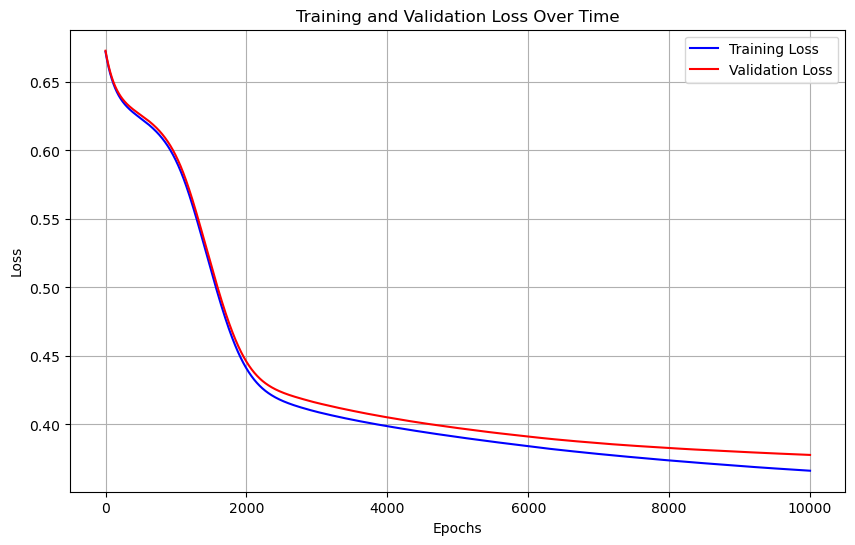

In [513]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label = "Training Loss", color = 'blue')
plt.plot(valid_losses, label = "Validation Loss", color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")
plt.legend()
plt.grid()
plt.show()

**_________________________________________________________________________________________________________________________________________**


## **Lets check the `Confusion Matrix` of our model, to see the model's accuracy**

We check confusion matrix because we have binary classification type of data, our target value is canceled or not_canceled

In [515]:
len(X_train), len(y_train)

(21742, 21742)

**How to Compute the Confusion Matrix in PyTorch: We can use sklearn.metrics.confusion_matrix to generate it.**

Steps:
1) Convert `X_valid_tensor` into model predictions.
2) Apply a threshold (e.g., 0.5) to classify as 0 or 1.
3) Compare predictions with y_valid_tensor.
4) Compute the confusion matrix.

In [517]:
from sklearn.metrics import confusion_matrix

In [518]:
# Get Model Predictions. 
# We use the validation data instead of training because the model already has seen the training data and it will perform 
# so much better on training data since it is trained by that data. Validation data is not seen by the model, and its accuracy rates will 
# tell us more about the models performance. 

with torch.no_grad():   
    X_valid_pred = nn_seq_model(X_valid_tensor) # get raw outputs
    y_valid_pred = (X_valid_pred>=0.5).float() # convert it to 0 or 1

In [519]:
# Compute Confusion Matrix

cm = confusion_matrix(y_valid_pred.numpy(), y_valid_tensor.numpy())

In [520]:
print(cm)

[[1644  436]
 [ 757 4411]]



### Lets plot a heatmap for confusion matrix using seaborn

In [522]:
import seaborn as sns

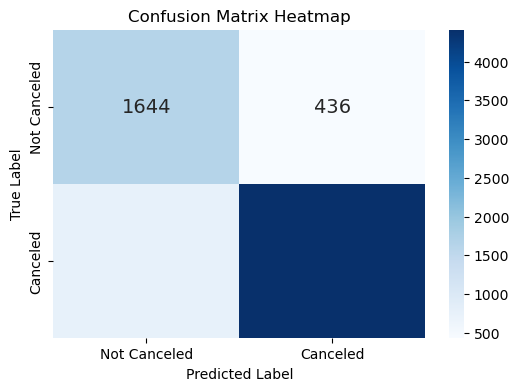

In [523]:
class_labels = ['Not Canceled', 'Canceled']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' ,xticklabels=class_labels, yticklabels=class_labels, cbar=True,annot_kws={"size": 14})

# Labels & title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [524]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1644  436]
 [ 757 4411]]


In [525]:
# TROUBLESHOOT (Why the bottom two sections have no values in)

print(np.isnan(cm))

[[False False]
 [False False]]


### Calculate the **`Accuracy`, `precision score`, `recall(sensitivity)`** and **`F1 Score`**

In [527]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_valid_tensor, y_valid_pred)
precision = precision_score(y_valid_tensor, y_valid_pred)
recall = recall_score(y_valid_tensor, y_valid_pred)
f1 = f1_score(y_valid_tensor, y_valid_pred)

con_matrix_results_df = pd.DataFrame(['Neural Network',accuracy, precision, recall, f1]).transpose()
con_matrix_results_df.columns= ['Model','Accuracy', 'Precision Score', 'Sensitivity', 'F1 Score']
con_matrix_results_df

# Accuracy Score: This means that the model correctly predicted 83.36% of the total instances
# Precision Score: refers to how many of the predicted "canceled" instances were actually canceled.
# Sensitivity (or recall):  measures the proportion of actual "canceled" bookings that the model correctly identifies.
# F1 Score: The F1 Score is the harmonic mean of precision and recall, providing a balance between them.

,Model,Accuracy,Precision Score,Sensitivity,F1 Score
0,Neural Network,0.835403,0.853522,0.910047,0.880879


## Calculate the **AUC** and plot **ROC curve.** 

In [529]:
from sklearn.metrics import roc_curve, auc

In [530]:
# Get the predicted probabilities (from the output of your model)

with torch.no_grad():
    X_valid_pred = nn_seq_model(X_valid_tensor)
    y_valid_pred = X_valid_pred.detach().numpy()

In [531]:
# Get the true values from y_valid_tensor 

y_valid_true = y_valid_tensor.detach().numpy()

In [532]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_valid_true, y_valid_pred)

In [533]:
roc_data = pd.DataFrame({"Threshold": thresholds, "FPR": fpr, "TPR": tpr})
roc_data # View first few rows

,Threshold,FPR,TPR
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.001238
2,1.000000,0.000000,0.001444
3,1.000000,0.000000,0.002269
4,0.999999,0.000000,0.003095
...,...,...,...
2209,0.009076,0.995419,1.000000
2210,0.008739,0.997085,1.000000
2211,0.005387,0.998751,1.000000
2212,0.004744,0.999584,1.000000


In [534]:
# Calculate AUC Score 

auc_score = auc(fpr, tpr)
auc_score

0.8939006312874072

In [535]:
# Let's add this AUC score to the con matrix results data frame

con_matrix_results_df['AUC'] = auc_score
con_matrix_results_df

,Model,Accuracy,Precision Score,Sensitivity,F1 Score,AUC
0,Neural Network,0.835403,0.853522,0.910047,0.880879,0.893901


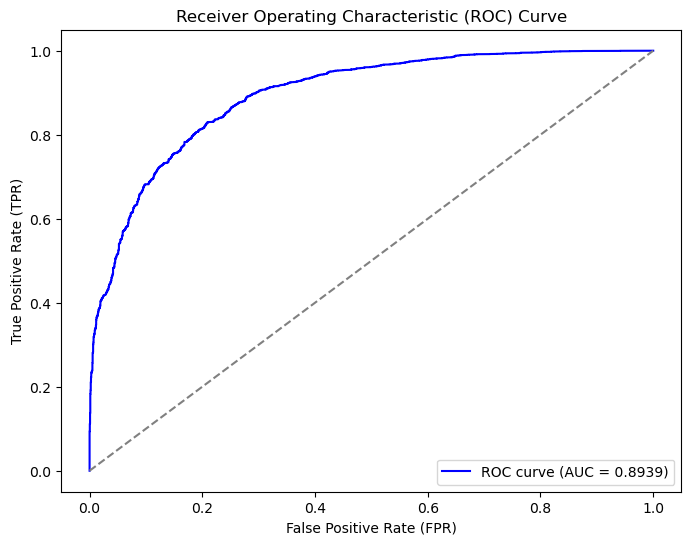

In [536]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**_________________________________________________________________________________________________________________________________________**

## **Nows let s think about how we can improve our model?**

### **`check the correlation in X datasets to`** (X is consist of the features, there is no target feature)

In [539]:
X.dtypes # (We have objects in X so we can't do correlation in categorical values) 

# We already converted the X to one hot encoded, so we can use X_train since it is one hot encoded

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
season                                   object
dtype: object

In [540]:
X_train.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_meal_plan_1           float64
type_of_meal_plan_meal_plan_2           float64
type_of_meal_plan_meal_plan_3           float64
type_of_meal_plan_not_selected          float64
room_type_reserved_room_type1           float64
room_type_reserved_room_type2           float64
room_type_reserved_room_type3           float64
room_type_reserved_room_type4           float64
room_type_reserved_room_type5           float64
room_type_reserved_room_type6           

In [541]:
corr_matrix = X_train.corr()

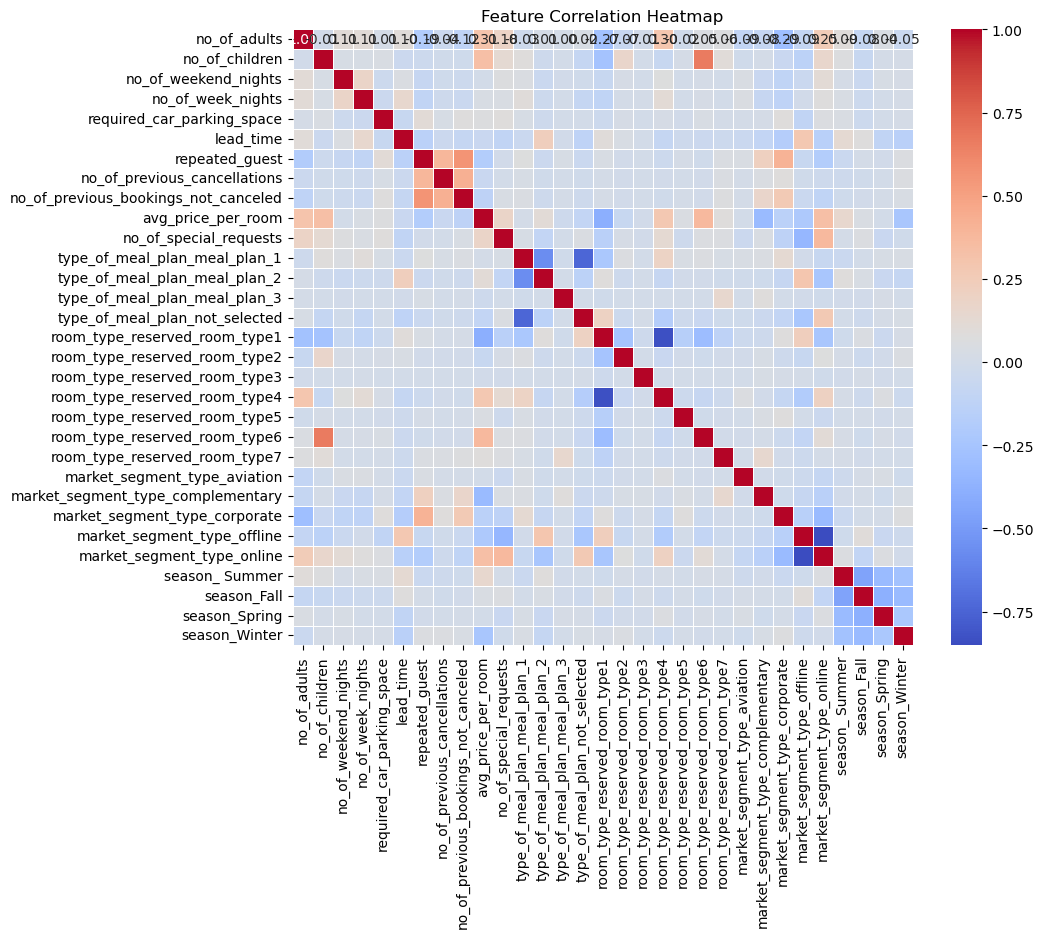

In [542]:
# Visualize the correlation heat map

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

In [543]:
# Get pairs of highly correlated features (got help from Google) -  list comprehension

high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2]) 
    for col1 in corr_matrix.columns 
    for col2 in corr_matrix.columns 
    if col1 != col2 and corr_matrix.loc[col1, col2] >= 0.7 or corr_matrix.loc[col1,col2] < -0.7
]

# Convert to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df

,Feature 1,Feature 2,Correlation
0,type_of_meal_plan_meal_plan_1,type_of_meal_plan_not_selected,-0.741590
1,type_of_meal_plan_not_selected,type_of_meal_plan_meal_plan_1,-0.741590
2,room_type_reserved_room_type1,room_type_reserved_room_type4,-0.833359
3,room_type_reserved_room_type4,room_type_reserved_room_type1,-0.833359
4,market_segment_type_offline,market_segment_type_online,-0.851823
5,market_segment_type_online,market_segment_type_offline,-0.851823


### Lets check the correlation between **`X_train`** and **`y_train`** to see which features are strongly related to the target feature

In [545]:
# We got NaNs because y_train_encoded is dataframe and we need pandas series.

type(y_train_encoded)

pandas.core.frame.DataFrame

In [546]:
y_train_encoded_series = y_train_encoded.squeeze() # convert the dataframe to pandas series

In [547]:
type(y_train_encoded_series)

pandas.core.series.Series

In [548]:
correlated_features = ['room_type_reserved_room_type1','room_type_reserved_room_type4', 'market_segment_type_offline','market_segment_type_online', 'type_of_meal_plan_meal_plan_1','type_of_meal_plan_not_selected']

In [549]:
corr_with_target = X_train.corrwith(y_train_encoded_series)  # Compute correlation with target
print(corr_with_target[correlated_features].abs().sort_values(ascending=False))  # Sort by importance


type_of_meal_plan_not_selected    0.006896
room_type_reserved_room_type4     0.006639
room_type_reserved_room_type1     0.005379
type_of_meal_plan_meal_plan_1     0.005307
market_segment_type_online        0.004573
market_segment_type_offline       0.002914
dtype: float64


**Based on the result above, I could keep `market_segment_type_online` and drop `market_segment_type_offline` since the online feature has a bigger correlation rate compared to offline. Because we know these features are highly correlated with each other, so we should drop the one that has low importance for our target feature.** 

**The same way, I can drop `room_type_reserved_room_type4` and keep `room_type_reserved_room_type1` to improve our model.**

## After checking correlation for `MULTICOLLINEARITY`. Now we can check `VIF` to make sure about the features 

In [552]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [553]:
# Some of the VIF scores were listed as inf, then I needed to drop three columns from each one hot encoded columns 
# in order to calculate the VIF scores. Now I see very high VIF scores on season columns. 

multi_corr_columns = ['room_type_reserved_room_type4','market_segment_type_offline','type_of_meal_plan_meal_plan_1']

X_train_dropped_corr = X_train.drop(multi_corr_columns, axis = 1)
X_valid_dropped_corr = X_valid.drop(multi_corr_columns, axis = 1)

In [554]:
vif_df = pd.DataFrame()
vif_df['features'] = X_train_dropped_corr.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_dropped_corr.values, i) for i in range(X_train_dropped_corr.shape[1])]

In [555]:
vif_df

,features,VIF
0,no_of_adults,1.362737
1,no_of_children,2.079745
2,no_of_weekend_nights,1.070324
3,no_of_week_nights,1.101093
4,required_car_parking_space,1.037646
5,lead_time,1.276568
6,repeated_guest,1.814354
7,no_of_previous_cancellations,1.292553
8,no_of_previous_bookings_not_canceled,1.600012
9,avg_price_per_room,2.128502


**_________________________________________________________________________________________________________________________________________**


### Scale the `X_train_dropped_corr` and `X_valid_dropped_corr`

### Then convert the `X_train_dropped_scaled` and `X_valid_dropped_scaled` to torch.tensor

In [557]:
X_train_dropped_scaled = scaler.fit_transform(X_train_dropped_corr)
X_train_dropped_scaled = pd.DataFrame(X_train_dropped_scaled, columns=X_train_dropped_corr.columns)

X_valid_dropped_scaled = scaler.transform(X_valid_dropped_corr)
X_valid_dropped_scaled = pd.DataFrame(X_valid_dropped_scaled, columns= X_train_dropped_corr.columns)

In [558]:
X_train_dropped_tensor = torch.tensor(X_train_dropped_scaled.values)
X_valid_dropped_tensor = torch.tensor(X_valid_dropped_scaled.values) 

X_train_dropped_tensor = X_train_dropped_tensor.float()
X_valid_dropped_tensor = X_valid_dropped_tensor.float()

In [559]:
X_train_dropped_corr.shape[1]

28

## Create a new model and training loop and run the model for the new tensors_drop 

In [561]:
input_dim_drop = X_train_dropped_corr.shape[1]

nn_seq_model_drop = nn.Sequential(
            nn.Linear(input_dim_drop,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(), 
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()  ## Sigmoid activation function for binary classification
)

nn_seq_model_drop

Sequential(
  (0): Linear(in_features=28, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
  (7): Sigmoid()
)

In [562]:
def training_loop_nn_drop(n_epochs, optimizer, model, loss_fn, X_train_tensor, X_valid_tensor, y_train_tensor, y_valid_tensor): 
    train_losses_drop = []
    valid_losses_drop = []
    
    for epoch in range (1, n_epochs + 1): 
        X_train_pred_drop = nn_seq_model_drop(X_train_dropped_tensor)
        loss_train_drop = loss_fn(X_train_pred_drop, y_train_tensor) 

        X_valid_pred_drop = nn_seq_model_drop(X_valid_dropped_tensor)
        loss_valid_drop = loss_fn(X_valid_pred_drop, y_valid_tensor)

        optimizer.zero_grad(),
        loss_train_drop.backward(),
        optimizer.step()

        train_losses_drop.append(loss_train_drop.item())
        valid_losses_drop.append(loss_valid_drop.item())

        if epoch == 1 or epoch % 1000 ==0: 
            print(f"Epoch {epoch}, Training loss {loss_train_drop.item() :.4f}," 
                  f" Validation loss {loss_valid_drop.item():.4f}")

    return train_losses_drop, valid_losses_drop

In [563]:
optimizer = optim.SGD(nn_seq_model_drop.parameters(), lr = 1e-2)

train_losses_drop, valid_losses_drop = training_loop_nn_drop(
    n_epochs= 10000, 
    optimizer= optimizer, 
    model= nn_seq_model_drop, 
    loss_fn= nn.BCELoss(),
    X_train_tensor= X_train_dropped_tensor, 
    X_valid_tensor= X_valid_dropped_tensor, 
    y_train_tensor= y_train_tensor, 
    y_valid_tensor= y_valid_tensor
)

print()

Epoch 1, Training loss 0.7043, Validation loss 0.7037
Epoch 1000, Training loss 0.6056, Validation loss 0.6078
Epoch 2000, Training loss 0.4851, Validation loss 0.4921
Epoch 3000, Training loss 0.4157, Validation loss 0.4246
Epoch 4000, Training loss 0.4018, Validation loss 0.4117
Epoch 5000, Training loss 0.3929, Validation loss 0.4030
Epoch 6000, Training loss 0.3857, Validation loss 0.4077
Epoch 7000, Training loss 0.3794, Validation loss 0.4013
Epoch 8000, Training loss 0.3740, Validation loss 0.3959
Epoch 9000, Training loss 0.3693, Validation loss 0.3915
Epoch 10000, Training loss 0.3651, Validation loss 0.3878



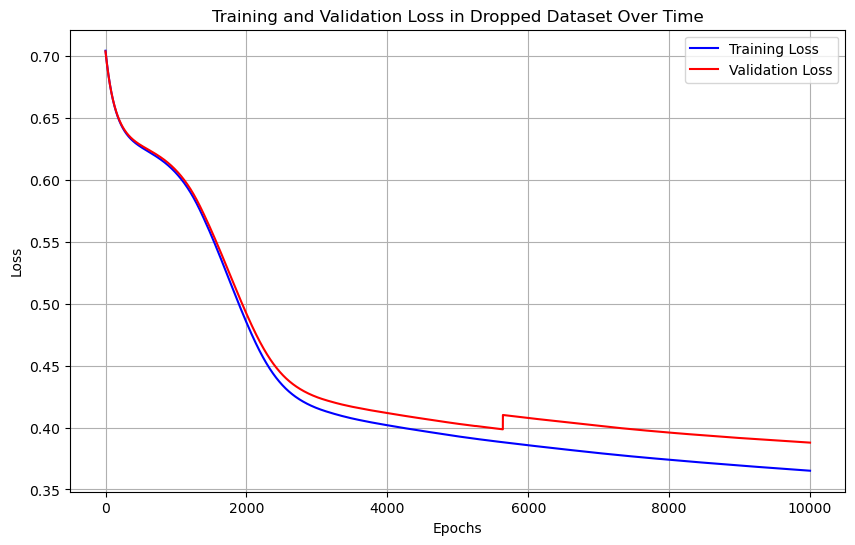

In [564]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_drop, label = "Training Loss", color = 'blue')
plt.plot(valid_losses_drop, label = "Validation Loss", color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss in Dropped Dataset Over Time")
plt.legend()
plt.grid()
plt.show()

In [565]:
with torch.no_grad(): 
    X_valid_drop_pred = nn_seq_model_drop(X_valid_dropped_tensor)
    y_valid_drop_pred = (X_valid_drop_pred > 0.5).float() 

In [566]:
cm_drop = confusion_matrix(y_valid_tensor, y_valid_drop_pred)
cm_drop

array([[1640,  761],
       [ 442, 4405]])

In [567]:
accuracy_drop = accuracy_score(y_valid_tensor, y_valid_drop_pred)
precision_drop = precision_score(y_valid_tensor, y_valid_drop_pred)
recall_drop = recall_score(y_valid_tensor, y_valid_drop_pred)
f1_drop = f1_score(y_valid_tensor, y_valid_drop_pred)

In [568]:
with torch.no_grad():
    X_valid_pred_drop = nn_seq_model_drop(X_valid_dropped_tensor)
    y_valid_pred_drop = X_valid_pred_drop.detach().numpy()

In [569]:
fpr_drop, tpr_drop, thresholds_drop = roc_curve(y_valid_true, y_valid_pred_drop)

In [570]:
auc_score_drop = auc(fpr_drop, tpr_drop)
auc_score_drop

0.8953963374211298

In [571]:
con_matrix_results_df

,Model,Accuracy,Precision Score,Sensitivity,F1 Score,AUC
0,Neural Network,0.835403,0.853522,0.910047,0.880879,0.893901


In [572]:
new_results = {
    "Model" : "Neural Network Drop",
    "Accuracy" : accuracy_drop, 
    "Precision Score" : precision_drop, 
    "Sensitivity" : recall_drop, 
    "F1 Score" : f1_drop, 
    "AUC" : auc_score_drop
}

In [573]:
con_matrix_results_df.loc[len(con_matrix_results_df)] = new_results


In [574]:
con_matrix_results_df

,Model,Accuracy,Precision Score,Sensitivity,F1 Score,AUC
0,Neural Network,0.835403,0.853522,0.910047,0.880879,0.893901
1,Neural Network Drop,0.834023,0.852691,0.90881,0.879856,0.895396


**_________________________________________________________________________________________________________________________________________**


# Before we run the model on X_test and y_test, 

- Apply one-hot encoding to X_test
- Apply label encoding to y_test
- Scale the X_test
- Convert X_test_scaled to tensor and y_test_encoded to tensor
- use the prefered model on X_test_tensor and y_test_tensor
- Check the Accuracy and AUC for the X_test. 
